### Based on Shipway and Hill

In [1]:
from PySDM_examples.Bhalla_2023.settings_1D import Settings
from PySDM_examples.Bhalla_2023.simulation_1D import Simulation
from PySDM_examples.Shipway_and_Hill_2012 import plot

In [2]:
settings = Settings(n_sd_per_gridbox=4)
simulation = Simulation(settings)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [3]:
results = simulation.run()
products = results.products

## Results

### Water in clouds

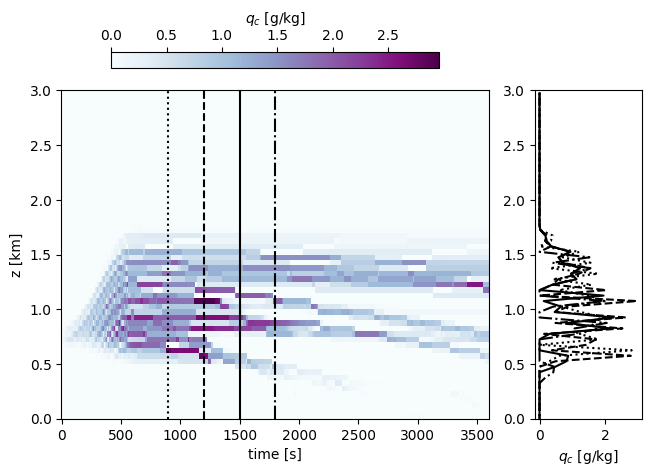

HTML(value="<a href='./1D q_c v_t-Interpolation n_sd_per_gridbox-4.pdf' target='_blank'>./1D q_c v_t-Interpola…

In [4]:
plot(var="qc", qlabel="$q_c$ [g/kg]", fname=simulation.get_plt_name("q_c")+".pdf",
             output=products)

### Water in rain

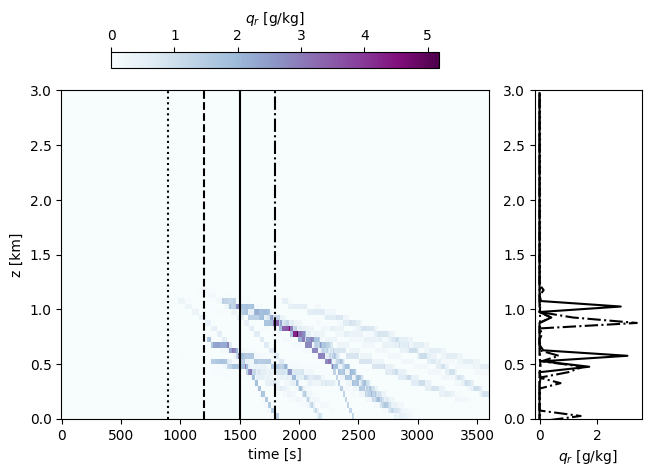

HTML(value="<a href='./1D q_r v_t-Interpolation n_sd_per_gridbox-4.pdf' target='_blank'>./1D q_r v_t-Interpola…

In [5]:
plot(var='qr', qlabel='$q_r$ [g/kg]', fname=simulation.get_plt_name("q_r")+".pdf",
         output=products)